# SHapley Additive explanations

Key Points About the California Housing Dataset:

- Features: It contains 8 features such as MedInc (Median Income), HouseAge, AveRooms, AveOccup, etc.
- Target: The target variable is MedHouseVal, which represents the median house value in California districts, measured in hundreds of thousands of dollars.
- Size: The dataset has 20,640 instances, which makes it a great dataset for regression tasks.

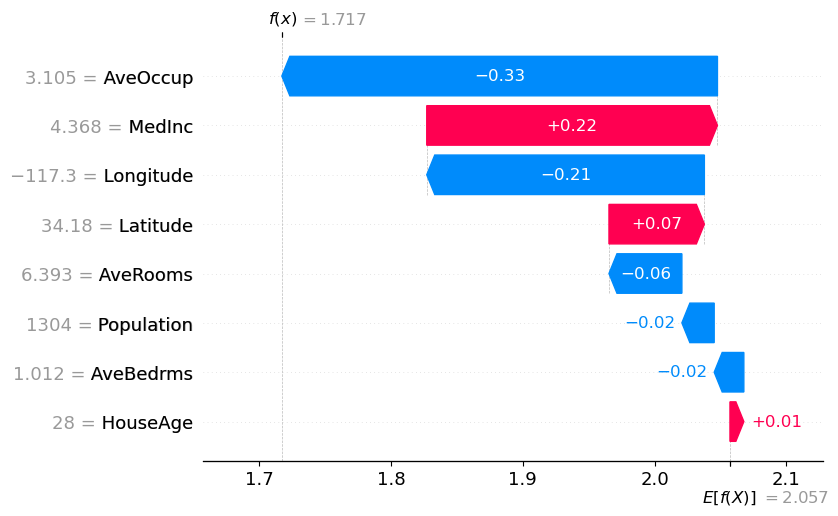

In [8]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Take a smaller sample of the dataset (e.g., 1000 samples)
sample_size = 1000
X_sample = X.sample(n=sample_size, random_state=42)
y_sample = y[X_sample.index]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Explain predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)  # Modern SHAP API returns an `Explanation` object

# Visualize the impact of features for the first prediction
shap.plots.waterfall(shap_values[0])  # Use the first prediction's SHAP values
